Визуализация данных файла films.csv
15 Вывести график зависимости количества выпускаемых фильмов  по годам

In [ ]:
import pandas as pd

file_path = "/home/films.csv"
df = pd.read_csv(file_path)

df.head()


,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015
1,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015
2,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015
3,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015
4,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015


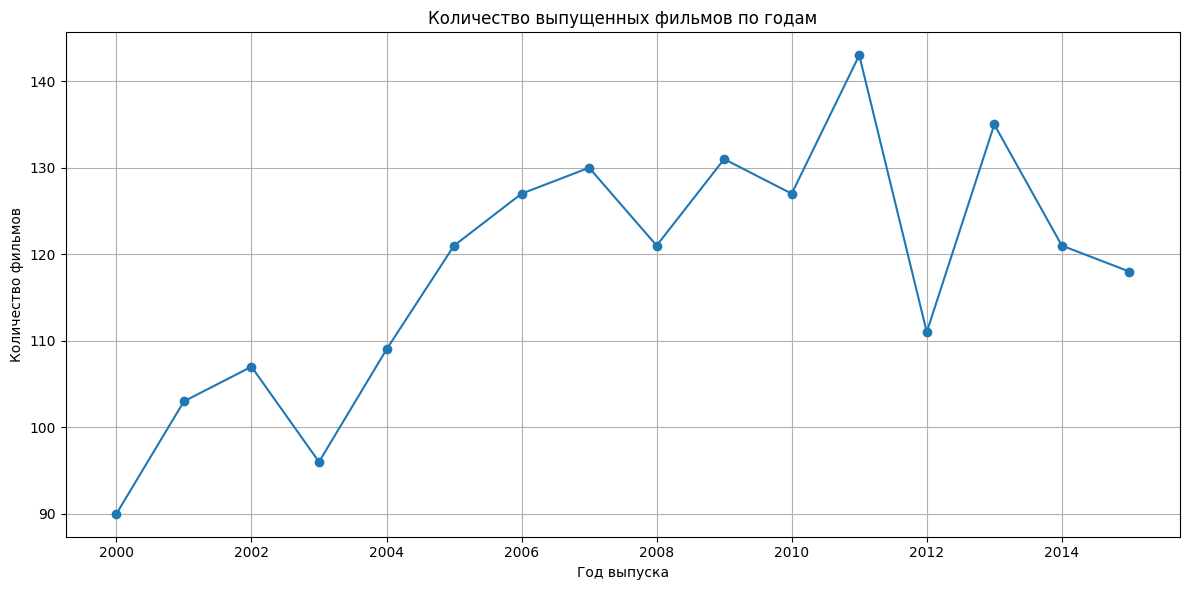

In [ ]:
import matplotlib.pyplot as plt

# Подсчёт количества фильмов по годам
films_per_year = df['release_year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(films_per_year.index, films_per_year.values, marker='o')
plt.title('Количество выпущенных фильмов по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество фильмов')
plt.grid(True)
plt.tight_layout()
plt.show()


5. Вывести боксплот показывающий взаимосвязь режиссеров и прибыли от фильмов.


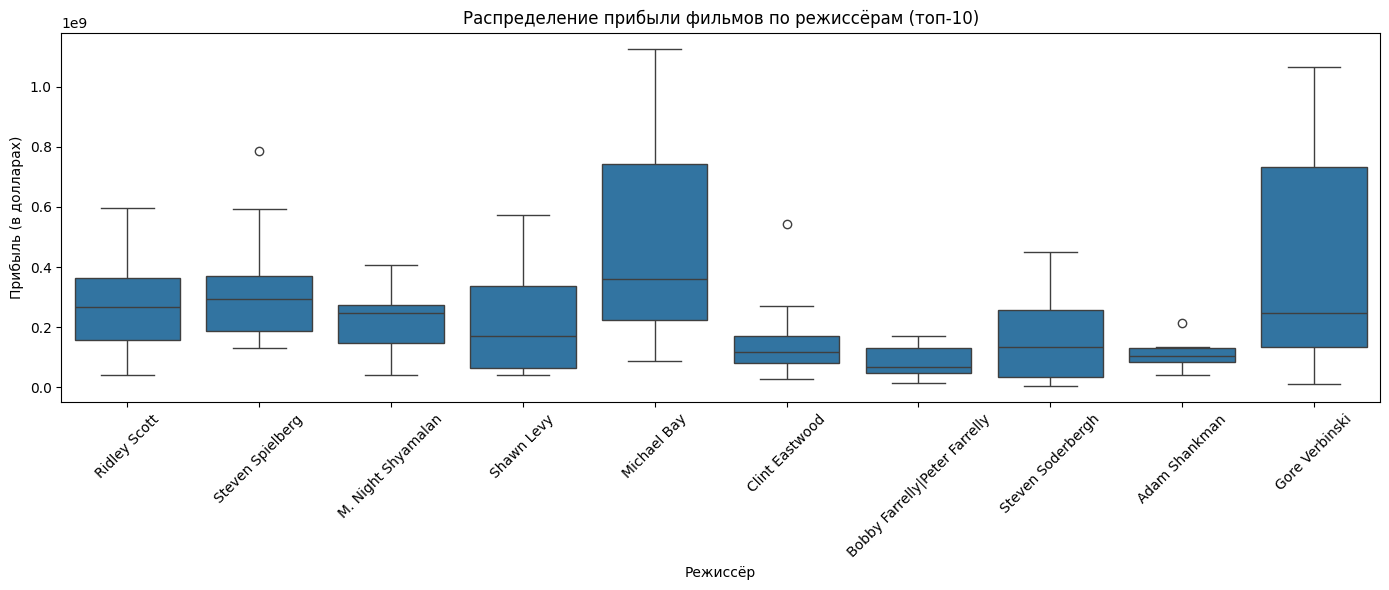

In [ ]:
import seaborn as sns

# Фильтрация данных: исключение строк с отсутствующими значениями и нулевой прибылью
df_filtered = df[['director', 'revenue']].dropna()
df_filtered = df_filtered[df_filtered['revenue'] > 0]

# берем топ-10 режиссёров по количеству фильмов
top_directors = df_filtered['director'].value_counts().nlargest(10).index
df_top = df_filtered[df_filtered['director'].isin(top_directors)]

plt.figure(figsize=(14, 6))
sns.boxplot(x='director', y='revenue', data=df_top)
plt.xticks(rotation=45)
plt.title('Распределение прибыли фильмов по режиссёрам (топ-10)')
plt.xlabel('Режиссёр')
plt.ylabel('Прибыль (в долларах)')
plt.tight_layout()
plt.show()
